In [1]:
from keras.datasets import imdb

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 19s 1us/step


In [4]:
x_train.shape

(25000,)

In [5]:
y_train.shape

(25000,)

In [6]:
x_test.shape

(25000,)

In [7]:
y_test.shape

(25000,)

In [10]:
def vectorize(sequence, dim=10000):
    results = np.zeros((len(sequence), dim))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1
    return results
x_train = vectorize(x_train)
x_test = vectorize(x_test)
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [14]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [15]:
x_train.shape

(25000, 10000)

In [16]:
x_val = x_train[:10000]
part_x_train = x_train[10000:]
y_val = y_train[:10000]
part_y_train = y_train[10000:]

In [24]:
hist = model.fit(part_x_train, part_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 120us/step - loss: 0.1854 - acc: 0.9338 - val_loss: 0.2905 - val_acc: 0.8815
Epoch 2/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.1669 - acc: 0.9420 - val_loss: 0.2798 - val_acc: 0.8884
Epoch 3/10
15000/15000 [==============================] - 2s 106us/step - loss: 0.1384 - acc: 0.9539 - val_loss: 0.3493 - val_acc: 0.8647
Epoch 4/10
15000/15000 [==============================] - 1s 91us/step - loss: 0.1199 - acc: 0.9615 - val_loss: 0.3023 - val_acc: 0.8830
Epoch 5/10
15000/15000 [==============================] - 2s 112us/step - loss: 0.1018 - acc: 0.9683 - val_loss: 0.3386 - val_acc: 0.8792
Epoch 6/10
15000/15000 [==============================] - 1s 91us/step - loss: 0.0840 - acc: 0.9756 - val_loss: 0.3509 - val_acc: 0.8794
Epoch 7/10
15000/15000 [==============================] - 2s 126us/step - loss: 0.0703 - acc: 0.9807 - val_loss: 0.3583 - va

In [27]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

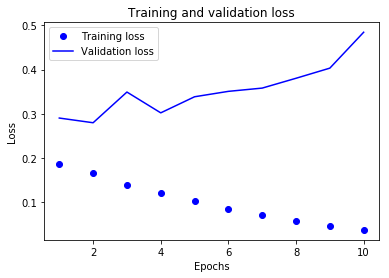

In [29]:
import matplotlib.pyplot as plt

acc = hist.history['acc'] 
val_acc = hist.history['val_acc'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot" 
plt.plot(epochs, loss, 'bo', label='Training loss') # b is for "solid blue line" 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

In [30]:
model.predict(x_test)

array([[0.0641195 ],
       [1.        ],
       [0.99871886],
       ...,
       [0.12141333],
       [0.11642601],
       [0.8598667 ]], dtype=float32)